In [4]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("All libraries are ready to use!")

All libraries are ready to use!


In [5]:
#from sklearn.datasets import load_iris
import pandas as pd

# Load the CSV file
iris = pd.read_csv('/content/iris_data.csv')

# Separate features (X) and target (y)
X = iris[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y = iris['label']  # Target (species)

# Display the features and target
print("Features (X):")
print(X)

print("\nTarget (y):")
print(y)

Features (X):
      sepal length  sepal width  petal length  petal width
0              5.2          3.8           1.5          0.3
1              5.3          4.1           1.5          0.1
2              4.8          3.1           1.5          0.2
3              5.2          3.7           1.5          0.2
4              4.9          3.0           1.5          0.3
...            ...          ...           ...          ...
2995           7.2          3.6           6.0          2.5
2996           7.3          3.0           6.2          2.1
2997           6.9          3.2           5.7          2.3
2998           7.5          2.8           6.0          2.0
2999           6.7          3.0           5.3          2.3

[3000 rows x 4 columns]

Target (y):
0          Iris-setosa
1          Iris-setosa
2          Iris-setosa
3          Iris-setosa
4          Iris-setosa
             ...      
2995    Iris-virginica
2996    Iris-virginica
2997    Iris-virginica
2998    Iris-virginica
2999    Ir

In [6]:
#View the first few rows:
print(X.head())
#Check dataset dimensions:
print(X.shape)
#Get summary statistics:
print(X.describe())
#Check for missing values:
print(X.isnull().sum())
#Analyze target distribution:
print(y.value_counts())


   sepal length  sepal width  petal length  petal width
0           5.2          3.8           1.5          0.3
1           5.3          4.1           1.5          0.1
2           4.8          3.1           1.5          0.2
3           5.2          3.7           1.5          0.2
4           4.9          3.0           1.5          0.3
(3000, 4)
       sepal length  sepal width  petal length  petal width
count   3000.000000  3000.000000   3000.000000  3000.000000
mean       5.865267     3.051833      3.767367     1.191000
std        0.805073     0.412472      1.751183     0.758022
min        4.300000     2.000000      0.900000     0.100000
25%        5.100000     2.800000      1.500000     0.300000
50%        5.800000     3.000000      4.300000     1.300000
75%        6.400000     3.300000      5.200000     1.800000
max        7.900000     4.400000      6.900000     2.500000
sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64
label
Iris-setosa        1000

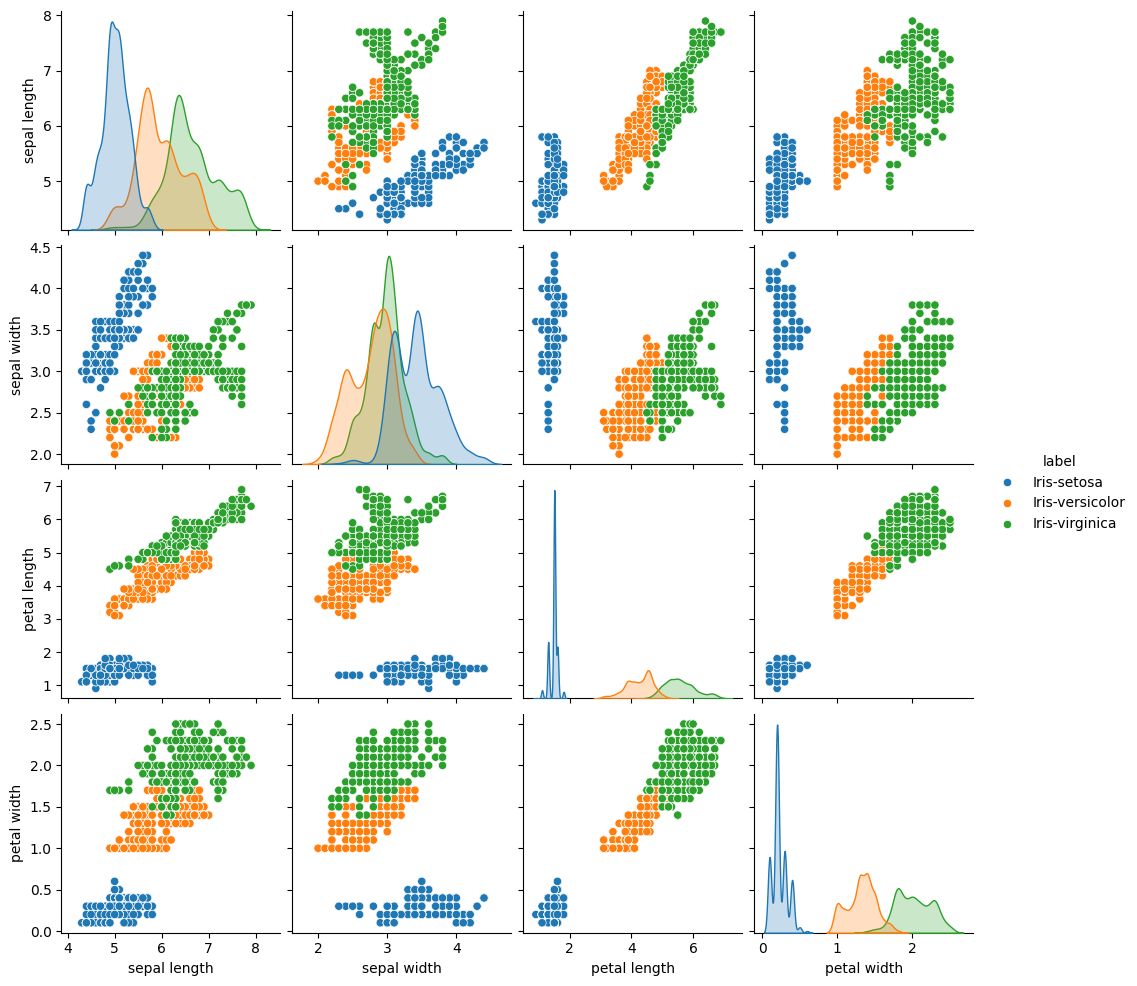

In [8]:
# prompt: Pair plots to see feature relationships

# Create a pair plot
#sns.pairplot(pd.concat([X, y], axis=1), hue=0)
#plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features (X) and target (y) into a single DataFrame
df = pd.concat([X, y], axis=1)

# Create a pair plot with 'label' as the hue
sns.pairplot(df, hue='label')  # Use the column name 'label' for hue
plt.show()

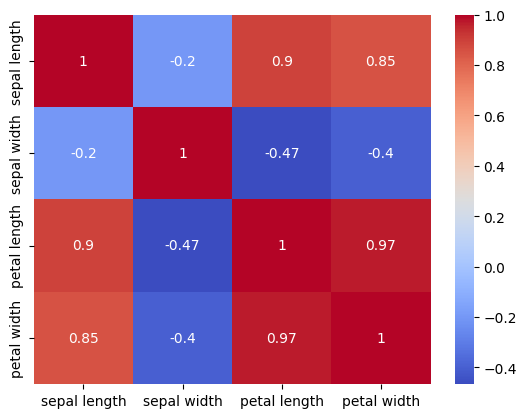

In [9]:

#Correlation heatmap
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

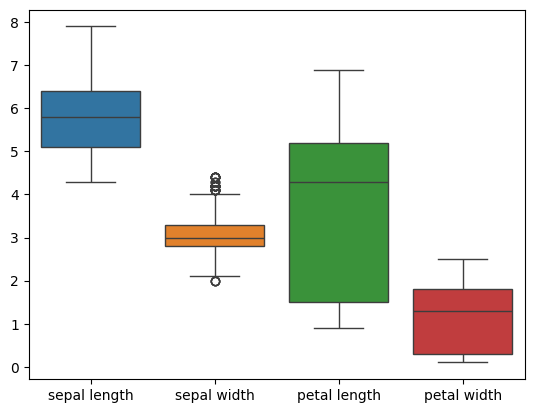

In [10]:
#Box plots for feature distributions
sns.boxplot(data=X)
plt.show()

In [11]:
#Split Data into Features and Target

#Separate the dataset into features (X) and target (y).
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
#Train and Evaluate Models

#Train multiple classifiers (Logistic Regression, Decision Tree, SVM) and evaluate their performance.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.995
Confusion Matrix:
 [[200   0   0]
 [  0 197   3]
 [  0   0 200]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00       200
Iris-versicolor       1.00      0.98      0.99       200
 Iris-virginica       0.99      1.00      0.99       200

       accuracy                           0.99       600
      macro avg       1.00      0.99      0.99       600
   weighted avg       1.00      0.99      0.99       600



In [13]:
#Compare Classifier Performance

#Compare models using metrics like accuracy, precision, recall, and F1-score.

from sklearn.metrics import precision_score, recall_score, f1_score

# Example for Logistic Regression
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

Precision: 0.9950738916256158
Recall: 0.995
F1-Score: 0.9949997187341789


In [14]:
#Feature Scaling and Impact Analysis

#Use StandardScaler to scale features and analyze the impact on model performance.
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate model with scaled data
model = LogisticRegression(solver='liblinear',max_iter=10000)#can use default one too
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
print("Accuracy with Scaling:", accuracy_score(y_test, y_pred_scaled))

Accuracy with Scaling: 0.9833333333333333


In [15]:
 #Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}

# Perform grid search with scaled data
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'solver': 'lbfgs'}


In [16]:
#Save the Best Model

#Save the best-performing model using joblib.
import joblib
# Save model
joblib.dump(grid_search.best_estimator_, 'best_model.pkl')
# Load model
loaded_model = joblib.load('best_model.pkl')

In [17]:
#for best model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.995
Confusion Matrix:
 [[200   0   0]
 [  0 197   3]
 [  0   0 200]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00       200
Iris-versicolor       1.00      0.98      0.99       200
 Iris-virginica       0.99      1.00      0.99       200

       accuracy                           0.99       600
      macro avg       1.00      0.99      0.99       600
   weighted avg       1.00      0.99      0.99       600



In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)

from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

from sklearn.svm import SVC

# Train SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_svm = svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

Logistic Regression Accuracy: 0.995
Decision Tree Accuracy: 1.0
SVM Accuracy: 0.99


In [19]:
#stroing the accuracy scores
accuracy_scores = [accuracy_log_reg, accuracy_dt, accuracy_svm]
print("Accuracy Scores:", accuracy_scores)

Accuracy Scores: [0.995, 1.0, 0.99]


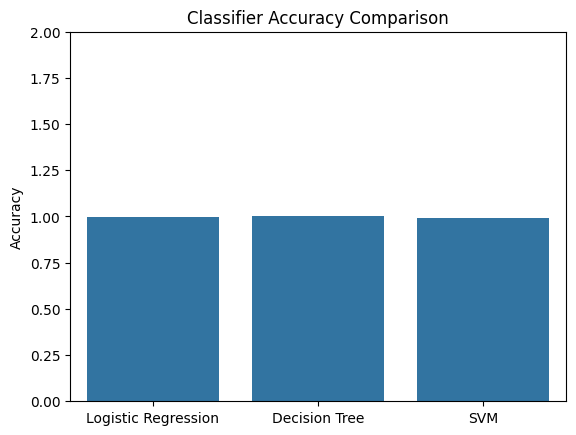

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier names
classifiers = ['Logistic Regression', 'Decision Tree', 'SVM']

# Plot
sns.barplot(x=classifiers, y=accuracy_scores)
plt.title("Classifier Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 2)  # Set y-axis limit between 0 and 1
plt.show()